In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
ca_ca_closed1, ca_ca_open1 = np.loadtxt('data/ca_ca_1.dat', skiprows=1, usecols=(3,)).reshape((2,20,-1))
ca_ca_closed2, ca_ca_open2 = np.loadtxt('data/ca_ca_2.dat', skiprows=1, usecols=(3,)).reshape((2,20,-1))

In [3]:
ca_ca_closed = np.hstack([ca_ca_closed1, ca_ca_closed2])
ca_ca_open = np.hstack([ca_ca_open1, ca_ca_open2])

In [4]:
def plot_a(ax):
    x = np.arange(ca_ca_closed.shape[1]) * 0.05
    ax.set_xlabel('t (ns)')
    ax.set_ylabel('d ($\AA$)')
    for y in ca_ca_closed:
        ax.plot(x[:-99], np.convolve(y, np.ones(100), 'valid') / 100, lw='1.')

In [5]:
def plot_b(ax):
    x = np.arange(ca_ca_closed.shape[1]) * 0.05
    y = np.mean((ca_ca_closed - ca_ca_closed[:,0][:, None]), axis=0)

    ax.set_xlabel('t (ns)')
    ax.set_ylabel('$d-d_0$ ($\AA$)')
    ax.plot(x, y)

In [10]:
def plot_c(ax):
    x = np.arange(2000) * 0.05
    y = np.mean((ca_ca_closed - ca_ca_closed[:,0][:, None]) ** 2, axis=0)[:2000]
    slope = np.dot(x, y) / np.dot(x, x)

    ax.set_xlabel('t (ns)')
    ax.set_ylabel('$<(d-d_0)^2>$ ($\AA^2$)')
    ax.plot(x, y)
    ax.plot(x, slope*x, color='black', lw=2.)

    equation = f'y = {slope:.4f}x'
    plt.text(100, 0.1, equation, color='black', horizontalalignment='right',)

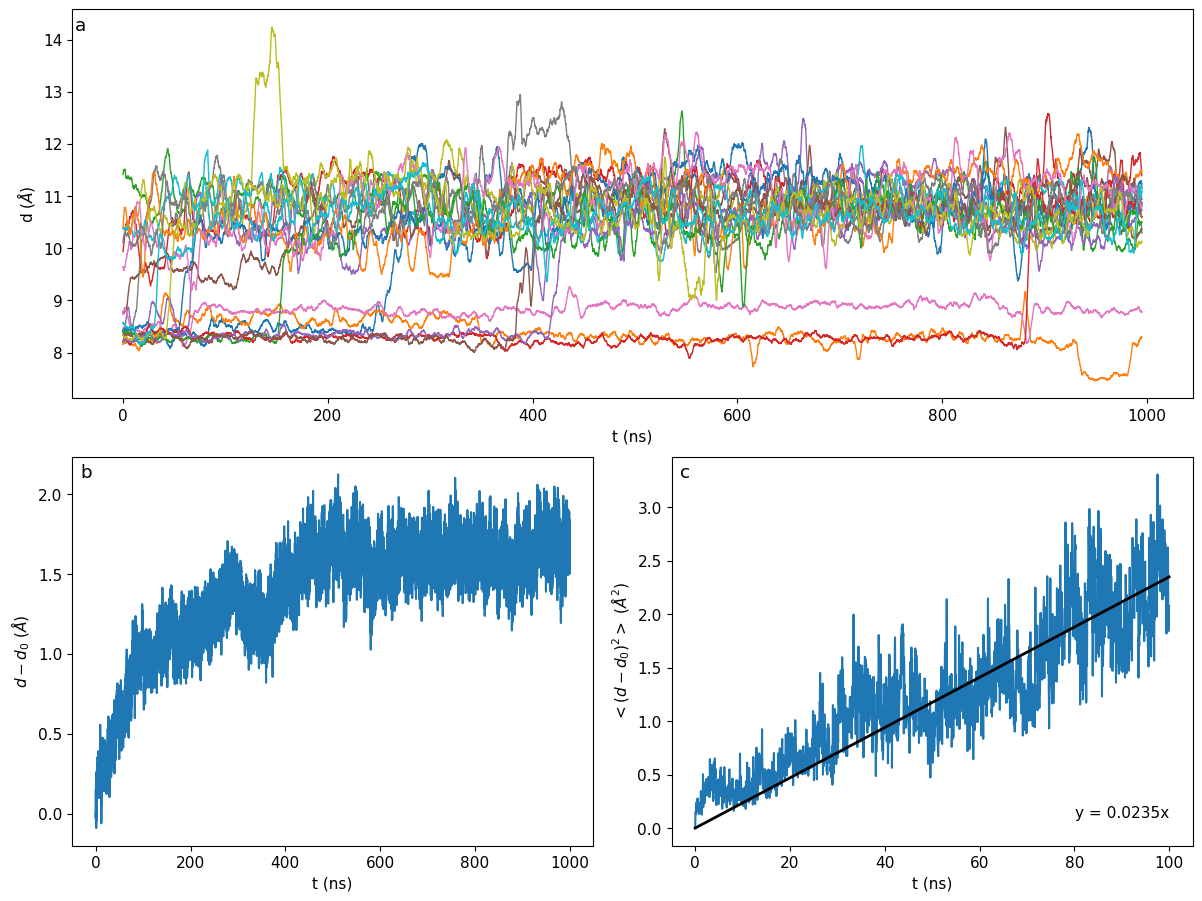

In [12]:
fig, axs = plt.subplot_mosaic([['a', 'a'], ['b', 'c']], figsize=(12,9))
fig.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.15)
plot_a(axs['a'])
plot_b(axs['b'])
plot_c(axs['c'])

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans, verticalalignment='top', fontsize='large')

plt.savefig('FigS4.png', dpi=300, bbox_inches='tight')
plt.show()